In [2]:
import numpy as np
from scipy import optimize as op
from numpy import linalg as la
from scipy.stats.distributions import norm
from matplotlib import pyplot as plt
%matplotlib inline

# Problem 1

In [3]:
with open('ARMA-Kalman-data/time_series_a.txt') as a:
    time_series_a = np.array(map(float,a.readline().split()))
with open('ARMA-Kalman-data/time_series_b.txt') as b:
    time_series_b = np.array(map(float,b.readline().split()))
with open('ARMA-Kalman-data/time_series_c.txt') as c:
    time_series_c = np.array(map(float,c.readline().split()))

IOError: [Errno 2] No such file or directory: 'ARMA-Kalman-data/time_series_a.txt'

In [3]:
def arma_likelihood(time_series, phis=np.array([]), thetas=np.array([]), mu=0., sigma=1.):
    """
    Return the log-likelihood of the ARMA model parameters, given the time
    series.
    Parameters
    ----------
    time_series : ndarray of shape (n,1)
        The time series in question, z_t
    phis : ndarray of shape (p,)
        The phi parameters
    thetas : ndarray of shape (q,)
        The theta parameters
    mu : float
        The parameter mu
    sigma : float
        The standard deviation of the a_t random variables
    
    Returns
    -------
    log_likelihood : float
        The log-likelihood of the model
    """
    n = len(time_series)
    p = len(phis)
    q = len(thetas)
    r = max(p,q+1)
    F = np.zeros((r,r))
    F[0,0:p] = phis
    F[1:r,0:-1] = np.eye(r-1)
    H = np.hstack((np.ones(1), thetas, np.zeros(r-q-1)))
    Q = np.zeros((r,r))
    Q[0,0] = sigma**2.
    
    xs = []
    Ps = []
    
    guess = np.zeros(r)
    Pguess = la.solve(np.eye(r**2.)-np.kron(F,F),Q.flatten()).reshape((r,r))
    
    for i in xrange(n):
        if i:
            guess = F.dot(x)
            Pguess = F.dot(P).dot(F.T) + Q
        y = time_series[i] - mu - H.dot(guess)
        S = H.dot(Pguess).dot(H.T)
        K = Pguess.dot(H.T)/S
        x = guess + K.dot(y)
        P = (np.eye(r)-np.outer(K,H)).dot(Pguess)
        xs.append(guess)
        Ps.append(Pguess)
        
    likelihood = 0.
    for i in xrange(len(xs)):
        mean = H.dot(xs[i])+mu
        std = np.abs(H.dot(Ps[i]).dot(H.T))
        likelihood += np.log(norm.pdf(time_series[i], loc=mean, scale=np.sqrt(std)))
    return likelihood,xs[-1],Ps[-1]
arma_likelihood(time_series_a, phis=np.array([0.9]), mu=17., sigma=0.4)[0]

/Users/benehlert/anaconda/lib/python2.7/site-packages/numpy/lib/twodim_base.py:233: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  m = zeros((N, M), dtype=dtype)
/Users/benehlert/anaconda/lib/python2.7/site-packages/numpy/lib/twodim_base.py:240: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  m[:M-k].flat[i::M+1] = 1


-77.603544965522758

# Problem 2

In [4]:
def arma_fit(time_series):
    """
    Return the ARMA model that minimizes AICc for the given time series,
    subject to p,q <= 3.
    Parameters
    ----------
    time_series : ndarray of shape (n,1)
    The time series in question, z_t
    Returns
    -------
    phis : ndarray of shape (p,)
    The phi parameters
    thetas : ndarray of shape (q,)
    The theta parameters
    mu : float
    The parameter mu
    sigma : float
    The standard deviation of the a_t random variables
    """
    mean = np.mean(time_series)
    sig = np.std(time_series)
    best_aic = np.inf
    n = len(time_series)
    for p in range(4):
        for q in range(4):
            print p,q
            k = p+q+2
            def f(x): # x contains the phis, thetas, mu, and sigma
                return -1*arma_likelihood(time_series, phis=x[:p], thetas=x[p:p+q], mu=x[-2],sigma=x[-1])[0]
            x0 = np.zeros(p+q+2)
            x0[-2] = time_series.mean()
            x0[-1] = time_series.std()
            sol = op.fmin(f,x0,maxiter=10000, maxfun=10000)
            aic = 2*k*(1+(k+1)/(n-k))+2*f(sol)
            if aic < best_aic:
                best_aic = aic
                bestq = q
                bestp = p
                bestphi = sol[:p]
                besttheta = sol[p:p+q]
                bestmu = sol[-2]
                bestsig = sol[-1]
    return bestphi,besttheta,bestmu,bestsig

# Problem 3

In [5]:
theta_a = arma_fit(time_series_a)
print len(theta_a[0]),len(theta_a[1]),theta_a

0 0
Optimization terminated successfully.
         Current function value: 98.149109
         Iterations: 22
         Function evaluations: 45
0 1
Optimization terminated successfully.
         Current function value: 75.074473
         Iterations: 84
         Function evaluations: 150
0 2
Optimization terminated successfully.
         Current function value: 63.797437
         Iterations: 149
         Function evaluations: 255
0 3
Optimization terminated successfully.
         Current function value: 58.776606
         Iterations: 343
         Function evaluations: 547
1 0
Optimization terminated successfully.
         Current function value: 59.438386
         Iterations: 89
         Function evaluations: 162
1 1
Optimization terminated successfully.
         Current function value: 50.745092
         Iterations: 202
         Function evaluations: 340
1 2
Optimization terminated successfully.
         Current function value: 50.045019
         Iterations: 561
         Function evalua

In [6]:
theta_b = arma_fit(time_series_b)
print len(theta_b[0]),len(theta_b[1]),theta_b

0 0
Optimization terminated successfully.
         Current function value: 1251.093918
         Iterations: 21
         Function evaluations: 43
0 1
Optimization terminated successfully.
         Current function value: 1249.741487
         Iterations: 75
         Function evaluations: 136
0 2
Optimization terminated successfully.
         Current function value: 1249.730484
         Iterations: 140
         Function evaluations: 244
0 3
Optimization terminated successfully.
         Current function value: 1249.356474
         Iterations: 220
         Function evaluations: 354
1 0
Optimization terminated successfully.
         Current function value: 1249.742690
         Iterations: 76
         Function evaluations: 136
1 1
Optimization terminated successfully.
         Current function value: 1249.736652
         Iterations: 101
         Function evaluations: 176
1 2
Optimization terminated successfully.
         Current function value: 1248.431140
         Iterations: 502
         F

In [7]:
theta_c = arma_fit(time_series_c)
print len(theta_c[0]),len(theta_c[1]),theta_c

0 0
Optimization terminated successfully.
         Current function value: 503.464900
         Iterations: 31
         Function evaluations: 63
0 1
Optimization terminated successfully.
         Current function value: 450.484801
         Iterations: 104
         Function evaluations: 190
0 2
Optimization terminated successfully.
         Current function value: 422.413074
         Iterations: 256
         Function evaluations: 433
0 3
Optimization terminated successfully.
         Current function value: 416.732743
         Iterations: 573
         Function evaluations: 918
1 0
Optimization terminated successfully.
         Current function value: 448.903782
         Iterations: 109
         Function evaluations: 203
1 1
Optimization terminated successfully.
         Current function value: 420.408583
         Iterations: 251
         Function evaluations: 427
1 2
Optimization terminated successfully.
         Current function value: 416.429369
         Iterations: 531
         Functi

# Problem 4

In [8]:
def arma_forecast(time_series, phis=np.array([]), thetas=np.array([]), mu=0.,sigma=1., future_periods=20):
    """
    Return forecasts for a time series modeled with the given ARMA model.
    Parameters
    ----------
    time_series : ndarray of shape (n,1)
    The time series in question, z_t
    phis : ndarray of shape (p,)
    The phi parameters
    thetas : ndarray of shape (q,)
    The theta parameters
    mu : float
    The parameter mu
    sigma : float
    The standard deviation of the a_t random variables
    future_periods : int
    The number of future periods to return
    Returns
    -------
    e_vals : ndarray of shape (future_periods,)
    The expected values of z for times n+1, ..., n+future_periods
    sigs : ndarray of shape (future_periods,)
    The standard deviations of z for times n+1, ..., n+future_periods
    """
    like = arma_likelihood(time_series, phis=phis, thetas=thetas, mu=mu,sigma=sigma)
    p = len(phis)
    q = len(thetas)
    r = max(p,q+1)
    F = np.zeros((r,r))
    F[0,0:p] = phis
    F[1:r,0:-1] = np.eye(r-1)
    H = np.concatenate([np.ones(1), thetas, np.zeros(r-q-1)])
    Q = np.zeros((r,r))
    Q[0,0] = sigma**2.
    
    xs = [like[1]]
    Ps = [like[2]]
    e_vals = []
    sigs = []
    
    for i in range(future_periods):
        xs.append(F.dot(xs[-1]))
        Ps.append(F.dot(Ps[-1].dot(F.T))+Q)
        e_vals.append(H.dot(xs[-1])+mu)
        sigs.append(np.sqrt(H.dot(Ps[-1].dot(H.T))))
    return np.array(e_vals),np.array(sigs)

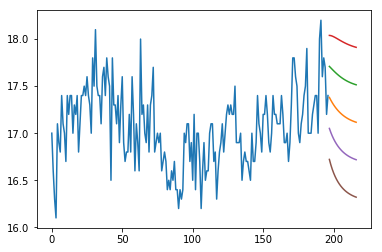

In [9]:
phis,thetas,mu,sigma = theta_a
e_vals,sigs = arma_forecast(time_series_a, phis, thetas, mu, sigma)
plt.plot(time_series_a)
n = len(time_series_a)
plt.plot(range(n,n+20),e_vals)
plt.plot(range(n,n+20),e_vals+sigs)
plt.plot(range(n,n+20),e_vals+2*sigs)
plt.plot(range(n,n+20),e_vals-sigs)
plt.plot(range(n,n+20),e_vals-2*sigs)
plt.show()

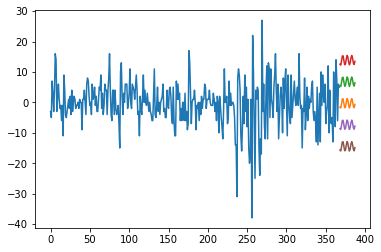

In [10]:
phis,thetas,mu,sigma = theta_b
e_vals,sigs = arma_forecast(time_series_b, phis, thetas, mu, sigma)
plt.plot(time_series_b)
n = len(time_series_b)
plt.plot(range(n,n+20),e_vals)
plt.plot(range(n,n+20),e_vals+sigs)
plt.plot(range(n,n+20),e_vals+2*sigs)
plt.plot(range(n,n+20),e_vals-sigs)
plt.plot(range(n,n+20),e_vals-2*sigs)
plt.show()

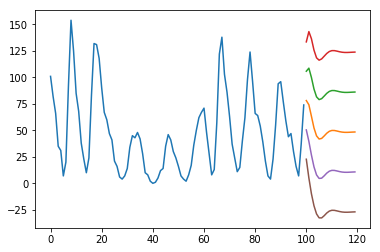

In [11]:
phis,thetas,mu,sigma = theta_c
e_vals,sigs = arma_forecast(time_series_c, phis, thetas, mu, sigma)
plt.plot(time_series_c)
n = len(time_series_c)
plt.plot(range(n,n+20),e_vals)
plt.plot(range(n,n+20),e_vals+sigs)
plt.plot(range(n,n+20),e_vals+2*sigs)
plt.plot(range(n,n+20),e_vals-sigs)
plt.plot(range(n,n+20),e_vals-2*sigs)
plt.show()

In [1]:
theta_a

NameError: name 'theta_a' is not defined